<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/UTS/REGRESI_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODEL REGRESI MENGGUNAKAN MLP : RegresiUTSTelkom.csv😶‍🌫️**

##Install & Import LIbrary

In [ ]:
!pip install tensorflow pandas matplotlib seaborn scikit-learn


In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/RegresiUTSTelkom.csv')


In [ ]:
# Display the first few rows
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


#Preprocessing

In [ ]:
# Check for null values
df.isnull().sum()

,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,1
68.40795,1
-1.82223,1
-27.46348,1


In [ ]:
# Drop any columns that contain null values (optional)
df.dropna(inplace=True)

In [ ]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258300 entries, 0 to 258416
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        258300 non-null  int64  
 1   49.94357    258300 non-null  float64
 2   21.47114    258300 non-null  float64
 3   73.0775     258300 non-null  float64
 4   8.74861     258300 non-null  float64
 5   -17.40628   258300 non-null  float64
 6   -13.09905   258300 non-null  float64
 7   -25.01202   258300 non-null  float64
 8   -12.23257   258300 non-null  float64
 9   7.83089     258300 non-null  float64
 10  -2.46783    258300 non-null  float64
 11  3.32136     258300 non-null  float64
 12  -2.31521    258300 non-null  float64
 13  10.20556    258300 non-null  float64
 14  611.10913   258300 non-null  float64
 15  951.0896    258300 non-null  float64
 16  698.11428   258300 non-null  float64
 17  408.98485   258300 non-null  float64
 18  383.70912   258300 non-null  float64
 19  326.515

In [ ]:
# Memindahkan kolom target '2001' ke posisi pertama
df = df[[df.columns[-1]] + [col for col in df.columns if col != df.columns[-1]]]

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['2001'])  # Menghapus kolom target dari fitur
y = df['2001']  # Kolom '2001' sebagai target


In [ ]:
# Cek hasilnya
print("Fitur (X) - Data:")
print(X.head())

print("\nTarget (y) - Data:")
print(y.head())

Fitur (X) - Data:
    2.26327  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  26.92061  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  -0.66345  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  18.85382  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  28.74903  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4   0.02263  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  40.14786   13.0162  -54.40548  \
0    8.76630   -0.92019  18.76548  ... -58.81266   5.66812  -19.68073   
1   -3.27872   -2.35035  16.07017  ...  66.00518   3.03800   26.05866   
2    5.05097  -10.34124   3.55005  ...  85.23416  34.57337 -171.70734   
3  -12.48207   -9.37636  12.63699  ... -30.64232   9.92661  -55.95724   
4   20.67345   -5.19943   3.63566  ...  47.25143   6.59753  -50.69577   

   58.99367  15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348  
0  

In [ ]:
# Melakukan penskalaan pada fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Build Model

In [ ]:
# Menyusun model MLP
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Menyusun model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])


##Train Model

In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 124.1390 - mae: 7.9552 - mse: 124.1390 - val_loss: 253.2543 - val_mae: 11.3719 - val_mse: 253.2543
Epoch 2/100
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 135.4711 - mae: 8.3617 - mse: 135.4711 - val_loss: 105.1663 - val_mae: 7.3058 - val_mse: 105.1663
Epoch 3/100
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 128.7396 - mae: 8.2283 - mse: 128.7396 - val_loss: 116.0776 - val_mae: 7.7974 - val_mse: 116.0776
Epoch 4/100
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 126.6322 - mae: 8.0970 - mse: 126.6322 - val_loss: 153.6835 - val_mae: 9.4155 - val_mse: 153.6835
Epoch 5/100
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 143.8397 - mae: 8.2591 - mse: 143.8397 - val_loss: 125.4409 - val_mae: 8.3428 - val_mse: 125.4409
Epoch 6/100
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 139.3306 - mae: 8.3461 - mse: 139.3306 - val_loss: 122.4126 - val_mae: 7.9500 - val_mse: 122.4126
Epoch 7/100
6458/6458 ━━━━━

## Evaluasi Model

In [ ]:
# Mengevaluasi model pada data pengujian
y_pred = model.predict(X_test)


1615/1615 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# Menghitung metrik regresi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

RMSE: 10.741664049746538
MSE: 115.38334655761719
R²: 0.054602205753326416


## Visualisasi

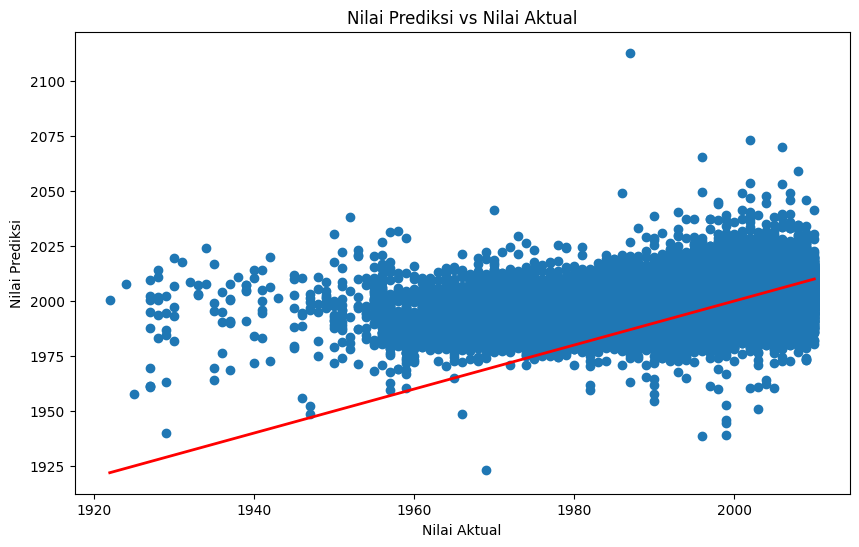

In [ ]:
# Visualisasikan nilai yang diprediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Prediksi vs Nilai Aktual')
plt.show()

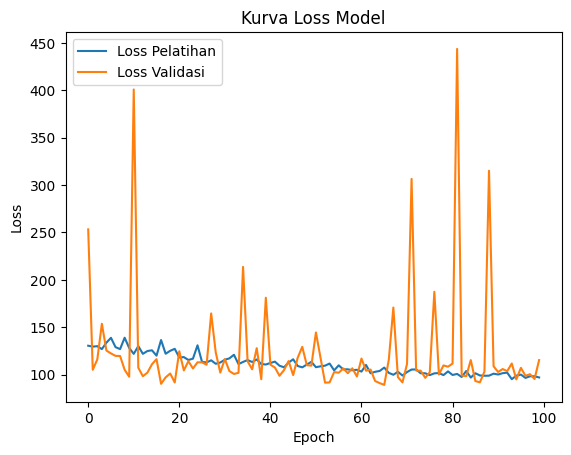

In [ ]:
# Plot kurva loss
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Kurva Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **ANALISIS**


**1. Jika menggunakan model MLP dengan 3 hidden layer (256-128-64) menghasilkan
underfitting pada dataset ini, modifikasi apa yang akan dilakukan pada arsitektur? Jelaskan alasan setiap perubahan dengan mempertimbangkan bias-variance tradeoff!**

Jawab :

Untuk mengatasi masalah underfitting, dapat dilakukan hal-hal berikut :
1. Meningkatkan jumlah hidden layer atau neuron agar dapat meningkatkan kapasitas model dalam menangkap pola yang lebih kompleks, yang dapat mengurangi underfitting.
2. Menambahkan lebih banyak layer dengan harapan model bisa menangkap lebih banyak fitur kompleks.
3. Penambahan teknik regularisasi seperti Dropout atau L2 regularization dapat membantu menghindari overfitting yang bisa terjadi setelah penambahan layer.
4. Menyesuaikan Learning Rate, kalo terlalu besar/kecil bisa nyebabin underfitting, sehingga perlu tuning agar learning rate optimal

Alasan :  Penambahan layer atau neuron meningkatkan kemampuan model dalam meng-handle data lebih kompleks, tetapi harus diimbangi dengan regulasi untuk menghindari overfitting.

**2. Selain MSE, loss function apa yang mungkin cocok untuk dataset ini? Bandingkan kelebihan dan kekurangannya, serta situasi spesifik di mana alternatif tersebut lebih unggul daripada MSE!**

Jawab :  

Beberapa loss function alternatif yang cocok untuk dataset ini:
1. MAE (Mean Absolute Error)
    - Kelebihan: Tidak terlalu terpengaruh oleh outliers, lebih robust terhadap data dengan distribusi yang sangat berbeda.
    - Kekurangan: Membuat model lebih sulit belajar pada data yang memiliki variasi kecil antara prediksi dan nilai aktual.
    - Situasi lebih unggul: Jika data memiliki outliers yang signifikan, MAE lebih baik daripada MSE karena MAE tidak memberikan penalti besar untuk error yang lebih besar.
2. Huber Loss:
    - Kelebihan: Kombinasi antara MSE dan MAE. Dapat menangani outliers dengan lebih baik daripada MSE, namun tetap mempertahankan kehalusan gradien yang lebih baik.
    - Kekurangan: Memerlukan pemilihan parameter delta yang baik agar dapat bekerja dengan baik pada dataset tertentu.
    - Situasi lebih unggul: Jika dataset mengandung kombinasi antara noise dan outliers, Huber loss bisa menjadi pilihan yang tepat


**3. Jika salah satu fitur memiliki range nilai 0-1, sedangkan fitur lain 100-1000, bagaimana ini memengaruhi pelatihan MLP? Jelaskan mekanisme matematis (e.g., gradien, weight update) yang terdampak!**

Jawab :     

- Masalah Skala Fitur: Perbedaan skala antara fitur (seperti 0-1 dan 100-1000) akan mempengaruhi pelatihan MLP, karena fitur dengan skala yang lebih besar akan mendominasi proses optimasi.

- Pengaruh pada Gradien dan Pembaruan Bobot:
   a. Fitur dengan rentang yang lebih besar (misalnya 100-1000) akan menghasilkan gradien yang lebih besar, yang bisa menyebabkan pembaruan bobot yang lebih besar dan potensi masalah dalam konvergensi.
   b. Untuk menghindari hal ini, fitur perlu distandarisasi (misalnya menggunakan standard scaling atau min-max scaling) agar semua fitur memiliki rentang yang seragam, sehingga gradien dan pembaruan bobot terjadi lebih merata.

Solusi :    

Gunakan StandardScaler atau MinMaxScaler untuk memastikan bahwa fitur berada dalam skala yang seragam.

**4. Tanpa mengetahui nama fitur, bagaimana Anda mengukur kontribusi relatif setiap fitur terhadap prediksi model? Jelaskan metode teknikal (e.g., permutation importance, weight analysis) dan keterbatasannya!**

- Permutation Importance: Menghitung pentingnya fitur dengan cara mengacak nilai fitur dan mengukur penurunan skor model. Fitur yang penting akan menyebabkan penurunan besar pada kinerja model saat diacak.

- Weight Analysis (untuk model linier atau MLP dengan analisis bobot): Analisis bobot model, di mana bobot yang lebih besar pada suatu fitur mengindikasikan kontribusi yang lebih besar terhadap prediksi.

-SHAP Values: SHAP (Shapley Additive Explanations) dapat memberikan kontribusi relatif untuk setiap fitur berdasarkan peran fitur dalam model.

**Bagaimana Anda mendesain eksperimen untuk memilih learning rate dan batch size secara optimal? Sertakan analisis tradeoff antara komputasi dan stabilitas pelatihan!**

- Grid Search atau Random Search: Uji berbagai kombinasi learning rate dan batch size untuk menemukan kombinasi yang optimal. Dimulai dengan nilai learning rate yang lebih kecil dan meningkat secara bertahap.

- Analisis Tradeoff:
    - Learning Rate: Learning rate yang lebih besar dapat mempercepat konvergensi tetapi dapat menyebabkan ketidakstabilan, sementara learning rate yang lebih kecil mungkin stabil tetapi lebih lambat.

    - Batch Size: Batch size yang lebih besar cenderung lebih stabil tetapi membutuhkan lebih banyak memori dan lebih sedikit iterasi untuk mencapai konvergensi. Batch size kecil memungkinkan model memperbarui bobot lebih sering, yang dapat mempercepat proses belajar tetapi lebih bising dan berisiko menyebabkan overfitting.

Strategi: Gunakan learning rate scheduling dan adaptive optimizers seperti Adam yang secara otomatis menyesuaikan learning rate, serta eksperimen dengan batch size yang lebih kecil untuk mengurangi waktu pelatihan.
